# Testing Public worksets in HTRC+Bookworm

In [1]:
import os
os.chdir("..") # Change wd to root for easy dev

In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
from bwypy import Bwypy
from bwypy import QueryBuilder, AND, OR
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Set logging
import logging
logger = logging.getLogger()
logger.setLevel(logging.DEBUG)

Connect to hathipd3rd database, which is where worksets are being tested.

In [4]:
endpoint = "http://bookworm.htrc.illinois.edu/cgi-bin/dbbindings.py"
database = "hathipd3rd"
bw = Bwypy(endpoint=endpoint, db=database)

A list of fields in the database:

In [5]:
bw.fields

DEBUG:root:Query time: 0s


,anchor,dbname,description,name,tablename,type
0,bookid,lc_classes,,lc_classes,lc_classesLookup,character
1,bookid,lc_subclasses,,lc_subclasses,lc_subclassesLookup,character
2,bookid,fiction_nonfiction,,fiction_nonfiction,fiction_nonfictionLookup,character
3,bookid,genres,,genres,genresLookup,character
4,bookid,languages,,languages,languagesLookup,character
5,bookid,format,,format,formatLookup,character
6,bookid,is_gov_doc,,is_gov_doc,is_gov_docLookup,character
7,bookid,page_count_bin,,page_count_bin,page_count_binLookup,character
8,bookid,word_count_bin,,word_count_bin,word_count_binLookup,character
9,bookid,publication_country,,publication_country,publication_countryLookup,character


The query builder uses some simply syntax for constructing BW API queries, albeit not in a Pythonic way (it does some low-level messing around).

In [6]:
# Set up Query Builder
fieldl = bw.fields["dbname"].tolist()
qb = QueryBuilder(fieldl)
query = qb.search_limits(qb.date_year > 0).groups(qb.date_year).query
query

{'groups': [u'date_year'], 'search_limits': [{u'date_year': {'$gt': 0}}]}

## List all public worksets

In [7]:
q = bw.default.copy()
q['search_limits'] = [{}]
q['groups'] = ["HTRC_public_worksets"]
q['counttype'] = ['TextCount']
a = bw.search(q)
a

DEBUG:root:{'counttype': ['TextCount'], 'search_limits': [{}], 'groups': ['HTRC_public_worksets'], 'database': 'hathipd3rd', 'words_collation': 'Case_Sensitive', 'method': 'return_json', 'compare_limits': []}
DEBUG:root:Query time: 0s


,TextCount
HTRC_public_worksets,
2darwin-english@sheilahoover,99
cooper_complete@ericleasemorgan,18
pirates@hchristenson,102
LabelsAustenDickens@lauvil,4
Bailey@Knipps,144
JaneAusten@azaytsev,15
tea_medicine_early@fgiannetti,32
coffee_medicine_early@fgiannetti,21
buckeye_small_set@reeset,74


Let's look at one of the bigger worksets.

In [8]:
workset = a.sort("TextCount", ascending=False).index[1]

## Grouping workset by one field (year)

In [9]:
query = qb.search_limits(qb.HTRC_public_worksets == workset).groups(qb.date_year).query
q = bw.default.copy()
q.update(query)
a = bw.search(q).sort(ascending=True)
a.loc[1920:1923]

DEBUG:root:{'counttype': ['TextCount', 'WordCount'], 'search_limits': [{u'HTRC_public_worksets': {'$eq': u'Maori_Astronomy@mfall3'}}], 'groups': [u'date_year'], 'database': 'hathipd3rd', 'words_collation': 'Case_Sensitive', 'method': 'return_json', 'compare_limits': []}
DEBUG:root:Query time: 0s


,TextCount,WordCount
date_year,,
1920,74,7084417
1921,94,11547302
1922,78,8755139
1923,7,2852373


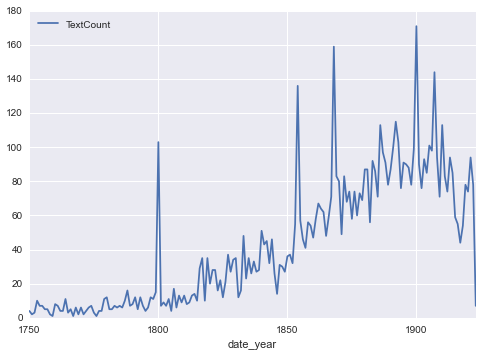

In [10]:
a.loc[1750:1923].reset_index().plot(x="date_year", y="TextCount")

## Grouping workset by two fields (year and lc_class)

In [11]:
query = qb.search_limits((qb.HTRC_public_worksets == workset)).groups(qb.date_year, qb.lc_classes).query
q = bw.default.copy()
q.update(query)

a = bw.search(q).sort(ascending=True)
a

DEBUG:root:{'counttype': ['TextCount', 'WordCount'], 'search_limits': [{u'HTRC_public_worksets': {'$eq': u'Maori_Astronomy@mfall3'}}], 'groups': [u'date_year', u'lc_classes'], 'database': 'hathipd3rd', 'words_collation': 'Case_Sensitive', 'method': 'return_json', 'compare_limits': []}
DEBUG:root:Query time: 2s


TextCount  \
date_year lc_classes                                                      
0         Agriculture                                                 8   
          Auxiliary Sciences of History                               0   
          Bibliography, Library Science, and General Info...          0   
          Education                                                   4   
          Fine Arts                                                   0   
          General Works                                               9   
          General and Old World History                              11   
          Geography, Anthropology, and Recreation                     3   
          History of America                                          0   
          History of the United States and British, Dutch...          0   
          Language and Literature                                     1   
          Law                                                         0   
          Medicine                                                    0   
          Military Science                                            2   
          Music                                                       0   
          Naval Science                                              34   
          Philosophy, Psychology, and Religion                        2   
          Political Science                                         211   
          Science                                                    17   
          Social Sciences                                             9   
          Technology                                                  3   
          unknown                                                    13   
9         unknown                                                     0   
19        unknown                                                     0   
59        Science                                                     0   
169       Social Sciences                                             0   
174       unknown                                                     0   
190       History of America                                          0   
          unknown                                                     0   
195       Language and Literature                                     0   
...                                                                 ...   
2011      Philosophy, Psychology, and Religion                        0   
          Political Science                                           0   
          Science                                                     0   
          Social Sciences                                             0   
          Technology                                                  0   
          unknown                                                     1   
2012      Language and Literature                                     0   
          Military Science                                            0   
          Political Science                                           0   
          Social Sciences                                             0   
          unknown                                                     0   
2013      Language and Literature                                     0   
          Political Science                                           0   
          unknown                                                     0   
2014      Social Sciences                                             0   
5539      Philosophy, Psychology, and Religion                        0   
5578      Philosophy, Psychology, and Religion                        0   
5579      Philosophy, Psychology, and Religion                        0   
5607      Philosophy, Psychology, and Religion                        0   
5626      Philosophy, Psychology, and Religion                        0   
5661      unknown                                                     0   
6546      un

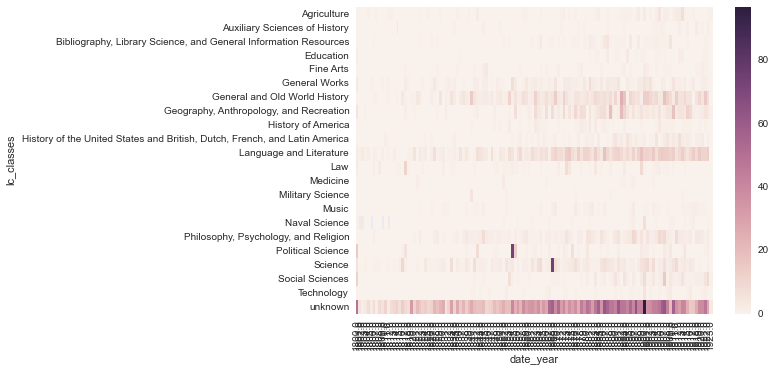

In [12]:
b = a.loc[1800:1923].reset_index()
c = b.pivot("lc_classes", "date_year", "TextCount")
sns.heatmap(c)

## Searching by class within a workset

DEBUG:root:{'counttype': ['TextCount', 'WordCount'], 'search_limits': [{u'lc_classes': ['Language and Literature', 'Science'], 'HTRC_public_worksets': u'Maori_Astronomy@mfall3'}], 'groups': [u'date_year'], 'database': 'hathipd3rd', 'words_collation': 'Case_Sensitive', 'method': 'return_json', 'compare_limits': []}
DEBUG:root:Query time: 0s


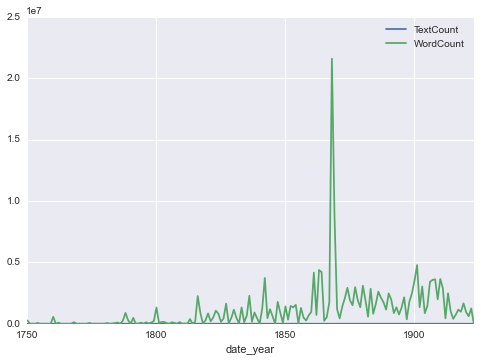

In [13]:
query = qb.groups(qb.date_year).query
q = bw.default.copy()
q.update(query)
# Note: querybuilder or bw had a bug to investigate later. This didn't work: search_limits((qb.lc_classes == 'Science') |OR| (qb.lc_classes == 'Language and Literature'))
q['search_limits'] = [{u'lc_classes': ['Language and Literature', 'Science'], 'HTRC_public_worksets': workset}] 

a = bw.search(q).sort(ascending=True)
a.loc[1750:1923].plot()

## Searching for a word within the workset

This goes very slow.

In [ ]:
query = qb.groups(qb.date_year).query
q = bw.default.copy()
q.update(query)
# Again, a bug with a query built with $and or $or, either with the query or the parsing
q['search_limits'] = [{u'word': ['dogs'], 'HTRC_public_worksets': workset}] 

a = bw.search(q).sort(ascending=True)
a.loc[1750:1923].reset_index().plot(x="date_year", y="WordCount")

DEBUG:root:{'counttype': ['TextCount', 'WordCount'], 'search_limits': [{u'word': ['dogs'], 'HTRC_public_worksets': u'Maori_Astronomy@mfall3'}], 'groups': [u'date_year'], 'database': 'hathipd3rd', 'words_collation': 'Case_Sensitive', 'method': 'return_json', 'compare_limits': []}
